In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [62]:
df = pd.read_json('reviews_Tools_and_Home_Improvement_5.json.gz', lines=True, compression='infer')

In [45]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A4IL0CLL27Q33,104800001X,D. Brennan,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,1390953600,"01 29, 2014"
1,A3Q5W5E7TDVLJF,104800001X,funnyc130,"[0, 0]",These little magnets are really powerful for t...,5,Neat,1369958400,"05 31, 2013"
2,A37KNOJXE2FU6,104800001X,Joseph Yonke II,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,1363132800,"03 13, 2013"
3,A3U4AFML9SZPWK,104800001X,"Leith Tussing ""I like tacos.""","[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,1371340800,"06 16, 2013"
4,A36Y7X194VWVKA,104800001X,Mark D.,"[23, 25]",They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,1376006400,"08 9, 2013"


In [76]:
df["total_votes"] = df.helpful.str[1]
df["helpful_votes"] = df.helpful.str[0]

df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,total_votes,helpful_votes
0,A4IL0CLL27Q33,104800001X,D. Brennan,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,1390953600,"01 29, 2014",1,0
1,A3Q5W5E7TDVLJF,104800001X,funnyc130,"[0, 0]",These little magnets are really powerful for t...,5,Neat,1369958400,"05 31, 2013",0,0
2,A37KNOJXE2FU6,104800001X,Joseph Yonke II,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,1363132800,"03 13, 2013",0,0
3,A3U4AFML9SZPWK,104800001X,"Leith Tussing ""I like tacos.""","[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,1371340800,"06 16, 2013",0,0
4,A36Y7X194VWVKA,104800001X,Mark D.,"[23, 25]",They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,1376006400,"08 9, 2013",25,23


In [51]:
len(df)

134476

In [55]:
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
134471,A1Q1Z7IR79G52A,B00LA96GLC,"Ann Ingersoll Madison Rain ""Ann""","[0, 0]",Super bright! Awesomely Comfortable. Easy to u...,5,Best headlamp you will ever buy!,1405468800,"07 16, 2014"
134472,A21T5C3KL41REL,B00LA96GLC,galbarran,"[0, 0]",I got this headlamp for my daughter since we r...,5,Light my kid up!,1405987200,"07 22, 2014"
134473,A2I8KUDXTC9WYI,B00LA96GLC,theresa,"[0, 0]",This is a real bright headlamp. I bought it f...,5,Very Bright Light.,1405814400,"07 20, 2014"
134474,AAOYA0DKWED4W,B00LA96GLC,WombatComputing,"[0, 0]",Easy to wear headlamp that's bright. Good for ...,5,Bright Lights,1405555200,"07 17, 2014"
134475,A18JF0T0GOCORW,B00LA96GLC,"Y.Trinh ""U""","[0, 0]",Very nice head lamp! Bright led. Fits head wit...,5,Great lamp!,1405728000,"07 19, 2014"


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134476 entries, 0 to 134475
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      134476 non-null  object
 1   asin            134476 non-null  object
 2   reviewerName    133757 non-null  object
 3   helpful         134476 non-null  object
 4   reviewText      134476 non-null  object
 5   overall         134476 non-null  int64 
 6   summary         134476 non-null  object
 7   unixReviewTime  134476 non-null  int64 
 8   reviewTime      134476 non-null  object
 9   total_votes     134476 non-null  int64 
 10  helpful_votes   134476 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 11.3+ MB


In [81]:
df.total_votes.describe()

count    134476.000000
mean          3.516546
std          17.719022
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        2423.000000
Name: total_votes, dtype: float64

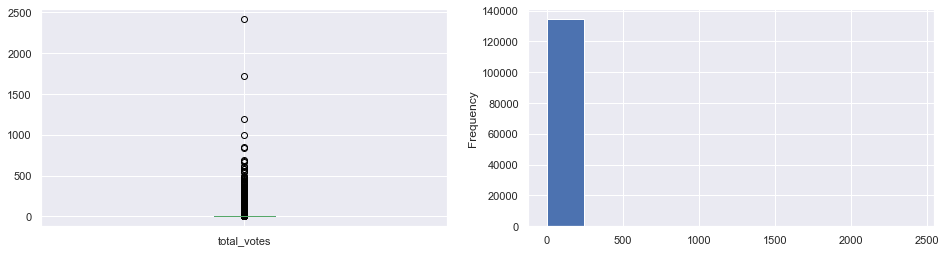

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))

ax1 = axes[0]
df.total_votes.plot(kind='box', ax=ax1)

ax2 = axes[1]
df.total_votes.plot(kind='hist', ax=ax2)

plt.show();

In [87]:
df = df[df.total_votes > 5]
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,total_votes,helpful_votes
134356,A3QNQQKJTL76H0,B00KDZGBGE,buru buru piggu,"[6, 6]",I am so glad LED lightbulbs are now becoming m...,4,Really great lightbulbs -- just like the old i...,1403654400,"06 25, 2014",6,6
134359,A1E45C97JEF57H,B00KDZGBGE,Edward Alexander Gerster,"[12, 13]",Quite a reasonable deal when buying 6 which co...,5,Exceptional value for very good LED A series l...,1403568000,"06 24, 2014",13,12
134366,A10ZFE6YE0UHW8,B00KDZGFFQ,C. MacPhail,"[9, 10]",.**Several models are represented in this amaz...,4,"Compared to Sylvania, Philips, and G7",1404086400,"06 30, 2014",10,9
134397,AGVWTYW0ULXHT,B00KGNZBM8,"Nathan Andersen ""Gadget lover and author of S...","[6, 6]","This is a nice set of paracord line, which is ...",4,A very nice bundle of very strong paracord &#8...,1403481600,"06 23, 2014",6,6
134399,A3UJRNI8UR4871,B00KGNZBM8,"Wulfstan ""wulfstan""","[6, 6]",Paracord bracelets are all the rage. They are ...,5,Make your own paracord bracelet,1402272000,"06 9, 2014",6,6
